Ch2 p59

Find the two intersection nearest the origin of the two curves:
1. x^2 + x - y^2 = 1
2. y - sin(x^2) = 0



In [2]:
from naf.linalg_exp import gedo, dosv, set_options
import naf.linalg_exp as la
import numpy as np
import math
from matplotlib import pyplot as plt

set_options(precision=10)

In [3]:
f1 = lambda x,y: math.pow(x,2) + x - math.pow(y,2) - 1
f2 = lambda x,y: y - math.sin(math.pow(x,2))
dxf1 = lambda x,y: 2.0*x + 1.0
dyf1 = lambda x,y: -2.0*y
dxf2 = lambda x,y: -2.0*x*math.cos(math.pow(x,2))
dyf2 = lambda x,y: 1.0

# testing function w/ known roots

# f1 = lambda x,y: 4 - x**2 - y**2
# f2 = lambda x,y: 1 - math.exp(x) - y
# dxf1 = lambda x,y: -2*x
# dyf1 = lambda x,y: -2*y
# dxf2 = lambda x,y: -math.exp(x)
# dyf2 = lambda x,y: -1

def a_m(z):
    x = z[0]
    y = z[1]
    return np.array([[dxf1(x,y),dyf1(x,y)],[dxf2(x,y),dyf2(x,y)]])

def b_v(z):
    x = z[0]
    y = z[1]
    return np.array([f1(x,y),f2(x,y)])

def two_eq_newton(x0, verbose=False):

    tol = 0.0001
    dx = np.array([tol*2, tol*2])
    num_iter = 0
    max_iter = 20

    while (abs(dx[0]) > tol or abs(dx[1]) > tol) and num_iter < max_iter:
        a = a_m(x0)
        b = -1*b_v(x0)

        lu, ov = gedo(a)
        dx = dosv(lu, ov, b)[ov]
        
        x0 = x0 + dx
        
        num_iter += 1
        
        if verbose:
            print(f'a: {a}')
            print(f'b: {b}')
            print(f'lu,ov: {lu},{ov}')
            print(f'dx: {dx}')
            print(f'x0: {x0}')
            print(f'num_iter: {num_iter}')
            print('\n')
            
    return x0, dx, num_iter
    
z1 = np.array([-2.0,1.0])
x1, dx1, ni1 = two_eq_newton(z1, verbose=False)
print(x1, dx1, ni1)

print('\n')
z2 = np.array([1.0, 1.0])
x2, dx2, ni2 = two_eq_newton(z2, verbose=False)
print(x2, dx2, ni2)

#testing function w/ known roots
# z1 = np.array([1.0, -1.7])
# x1, dx1, ni1 = two_eq_newton(z1, verbose=False)
# print(x1, dx1, ni1)

# print('\n')
# z2 = np.array([-1.9, 1.0])
# x2, dx2, ni2 = two_eq_newton(z2, verbose=False)
# print(x2, dx2, ni2)



[-1.67009303  0.34513433] [-5.80e-09 -1.86e-08] 5


[0.72595073 0.5029465 ] [2.16185e-05 2.72815e-05] 4


The equations from above must be converted to a different form to be able to graph them. I tried graphing them in modified form for the solution and it doesn't make sense when they are plotted. 
</br>

I'm not sure how to graph an equation with a plus/minus in python effecitvely. I got it work and in an approximate manner.
</br>

From what I can gather eq. (1) is imaginary at x=0 but I believe eq. (2) is everywhere defined.
</br>

Figuring out where eq. (1) is defined is interesting:
Take the bit that is inside the sqrt, x^2 + x - 1 and factor it. 
x = -1/2 +/- sqrt(5)/2
if x > -1/2 + sqrt(5)/2 eq. (1) is defined
if x < 1/2 - sqrt(5)/2 eq. (1) is defined
x ~= +0.618, -1.618
</br>

I don't know that I have ever run into a situation where you factor part of an equation to get its defined range. Really quite interesting. Even more interesting is the graph of the x^2+x-1 equation. It clearly shows where the values are greater than zero and therefore defined for eq. (1), and where the values are less than zero and therefore imaginary for eq. (1). It is a simple parabola. 

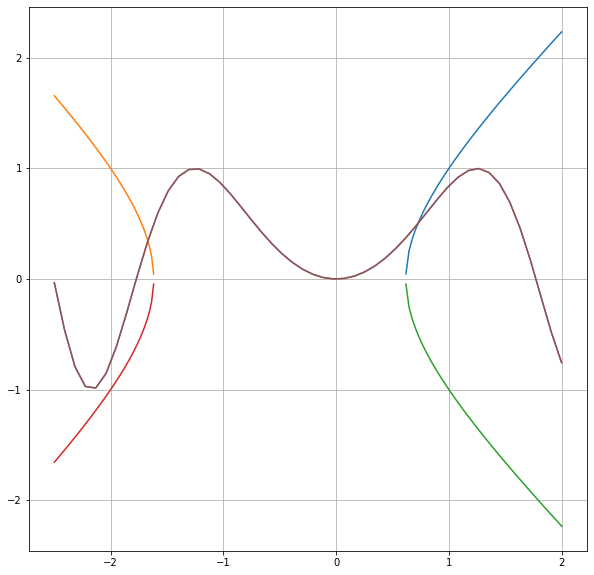

In [3]:
xrange = np.linspace(0.619,2)
xrange2 = np.linspace(-1.619,-2.5)
xrange3 = np.linspace(-2.5,2)

f1 = lambda x: math.sqrt(x**2 + x - 1)
f2 = lambda x: math.sin(x**2)
f3 = lambda x: -1*math.sqrt(x**2 + x - 1)

vf1 = np.vectorize(f1)
vf2 = np.vectorize(f2)
vf3 = np.vectorize(f3)

plt.figure(figsize=(10,10))
plt.plot(xrange, vf1(xrange), xrange2, vf1(xrange2), xrange, vf3(xrange), xrange2, vf3(xrange2),xrange3, vf2(xrange3), xrange3, vf2(xrange3))
plt.grid(b=True, which='major', axis='both')
plt.show()